##### NOTE:
This is the second notebook in our project, this contains the code for the analysis of the data.

## Load the data

In [1]:
import pandas as pd

# Load the dataset from the provided file path
file_path = 'final_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

/Users/saumkothari/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,permno,date,prc,shrout,market_cap,ret,retx,gvkey,datadate,tic,...,operating_margin,net_margin,current_ratio,debt_to_equity,interest_coverage,linktype_y,linkprim_y,linkdt_y,linkenddt_y,avg_sentiment
0,10220,2013-01-31,26.64,119004.0,3.170267e+09,0.016794,0.016794,185229,2013-12-31,BWXT,...,0.155681,0.105860,1.550238,0.004204,105.701350,LC,P,2010-08-02,NaN,0.0
1,10220,2013-01-31,26.64,119004.0,3.170267e+09,0.016794,0.016794,185229,2014-12-31,BWXT,...,-0.000755,0.010054,1.798118,0.303608,-0.232725,LC,P,2010-08-02,NaN,0.0
2,10220,2013-01-31,26.64,119004.0,3.170267e+09,0.016794,0.016794,185229,2015-12-31,BWXT,...,0.119951,0.092873,1.829651,1.129025,15.604632,LC,P,2010-08-02,NaN,0.0
3,10220,2013-01-31,26.64,119004.0,3.170267e+09,0.016794,0.016794,185229,2016-12-31,BWXT,...,0.163263,0.118058,1.576742,3.500207,27.840207,LC,P,2010-08-02,NaN,0.0
4,10220,2013-01-31,26.64,119004.0,3.170267e+09,0.016794,0.016794,185229,2017-12-31,BWXT,...,0.170956,0.088011,1.653185,1.783251,17.426968,LC,P,2010-08-02,NaN,0.0


In [2]:
columns_to_drop = ['linktype_y', 'linkprim_y', 'linkdt_y', 'linkenddt_y', 'date', 'gvkey']
data = data.drop(columns=columns_to_drop)

# Rename 'datadate' to 'date' and move it to the front
data = data.rename(columns={'datadate': 'date'})
data = data[['date'] + [col for col in data.columns if col != 'date']]

# Display the first few rows to confirm the changes
data.head()

,date,permno,prc,shrout,market_cap,ret,retx,tic,at,lt,...,ps_ratio,enterprise_value,ev_to_ebitda,gross_margin,operating_margin,net_margin,current_ratio,debt_to_equity,interest_coverage,avg_sentiment
0,2013-12-31,10220,26.64,119004.0,3.170267e+09,0.016794,0.016794,BWXT,2609.153,1426.212,...,1.252977,2211.240,3.799447,0.318303,0.155681,0.105860,1.550238,0.004204,105.701350,0.0
1,2014-12-31,10220,26.64,119004.0,3.170267e+09,0.016794,0.016794,BWXT,2856.936,1842.735,...,1.023131,2787.848,26.241286,0.212824,-0.000755,0.010054,1.798118,0.303608,-0.232725,0.0
2,2015-12-31,10220,26.64,119004.0,3.170267e+09,0.016794,0.016794,BWXT,1382.139,1102.504,...,1.024158,1508.570,6.583301,0.316100,0.119951,0.092873,1.829651,1.129025,15.604632,0.0
3,2016-12-31,10220,26.64,119004.0,3.170267e+09,0.016794,0.016794,BWXT,1579.815,1429.405,...,0.981490,1958.621,6.382513,0.341658,0.163263,0.118058,1.576742,3.500207,27.840207,0.0
4,2017-12-31,10220,26.64,119004.0,3.170267e+09,0.016794,0.016794,BWXT,1712.339,1426.582,...,0.981020,2007.825,5.762707,0.339446,0.170956,0.088011,1.653185,1.783251,17.426968,0.0


In [3]:
data

,date,permno,prc,shrout,market_cap,ret,retx,tic,at,lt,...,ps_ratio,enterprise_value,ev_to_ebitda,gross_margin,operating_margin,net_margin,current_ratio,debt_to_equity,interest_coverage,avg_sentiment
0,2013-12-31,10220,26.64000,119004.0,3.170267e+09,0.016794,0.016794,BWXT,2609.153,1426.212,...,1.252977,2211.240,3.799447,0.318303,0.155681,0.105860,1.550238,0.004204,105.701350,0.00
1,2014-12-31,10220,26.64000,119004.0,3.170267e+09,0.016794,0.016794,BWXT,2856.936,1842.735,...,1.023131,2787.848,26.241286,0.212824,-0.000755,0.010054,1.798118,0.303608,-0.232725,0.00
2,2015-12-31,10220,26.64000,119004.0,3.170267e+09,0.016794,0.016794,BWXT,1382.139,1102.504,...,1.024158,1508.570,6.583301,0.316100,0.119951,0.092873,1.829651,1.129025,15.604632,0.00
3,2016-12-31,10220,26.64000,119004.0,3.170267e+09,0.016794,0.016794,BWXT,1579.815,1429.405,...,0.981490,1958.621,6.382513,0.341658,0.163263,0.118058,1.576742,3.500207,27.840207,0.00
4,2017-12-31,10220,26.64000,119004.0,3.170267e+09,0.016794,0.016794,BWXT,1712.339,1426.582,...,0.981020,2007.825,5.762707,0.339446,0.170956,0.088011,1.653185,1.783251,17.426968,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875831,2019-06-30,93427,161.89999,36331.0,5.881989e+09,0.044516,0.044516,FN,1255.318,392.219,...,1.262099,879.424,5.675790,0.131585,0.078897,0.076344,3.270537,0.071183,23.229697,0.00
875832,2020-06-30,93427,161.89999,36331.0,5.881989e+09,0.044516,0.044516,FN,1381.387,406.978,...,1.188542,945.484,6.215383,0.131815,0.073847,0.069117,3.362078,0.061188,39.830815,0.34
875833,2021-06-30,93427,161.89999,36331.0,5.881989e+09,0.044516,0.044516,FN,1616.122,503.602,...,1.162876,1114.147,5.956476,0.136807,0.080238,0.078932,3.043733,0.041309,137.087273,0.00
875834,2022-06-30,93427,161.89999,36331.0,5.881989e+09,0.044516,0.044516,FN,1835.641,581.959,...,1.232389,1388.506,5.704837,0.140088,0.090465,0.088577,2.832326,0.024917,153.643393,0.00


In [4]:
# Count the number of zeros in the 'ret' column of the dataframe 'data'
zero_count_in_ret = data['ret'].eq(0).sum()

zero_count_in_ret

1198

In [5]:
data['ep_ratio'] = 1 / data['pe_ratio']
data['bp_ratio'] = 1 / data['pb_ratio']

# Drop the original 'pe_ratio' and 'pb_ratio' columns
data = data.drop(columns=['pe_ratio', 'pb_ratio'])

#### Check how frequency of stocks values

In [6]:
# Calculate the frequency of each ticker in the 'tic' column
ticker_frequencies = data['tic'].value_counts()

ticker_frequencies

tic
WEN     5240
LECO    3780
ABEV    3510
UGI     2838
JEF     2706
        ... 
ODD        1
ARQL       1
ISPO       1
SOND       1
BGRY       1
Name: count, Length: 2377, dtype: int64

In [7]:
data.columns

Index(['date', 'permno', 'prc', 'shrout', 'market_cap', 'ret', 'retx', 'tic',
       'at', 'lt', 'ceq', 'revt', 'gp', 'oiadp', 'ni', 'act', 'lct', 'dltt',
       'dlc', 'che', 'xint', 'ebitda', 'epspx', 'ps_ratio', 'enterprise_value',
       'ev_to_ebitda', 'gross_margin', 'operating_margin', 'net_margin',
       'current_ratio', 'debt_to_equity', 'interest_coverage', 'avg_sentiment',
       'ep_ratio', 'bp_ratio'],
      dtype='object')

Here is a brief explanation of the listed columns:

### General Information
1. **`date`**: The date associated with the financial or market data, often representing the end of a reporting period.
2. **`permno`**: A unique identifier for a security in the CRSP database.
3. **`gvkey`**: A unique identifier for a company in the Compustat database.
4. **`tic`**: The stock ticker symbol for a company's shares on a stock exchange.

### Market and Valuation Metrics
5. **`prc` (Price)**: The stock's price at the close of the trading period.
6. **`shrout` (Shares Outstanding)**: The total number of shares issued by the company and available to trade.
7. **`market_cap` (Market Capitalization)**: The total value of a company's shares, calculated as `prc * shrout`.
8. **`ep_ratio` (Earnings-to-Price Ratio)**: A valuation metric showing the ratio of a company's current share price to its earnings per share.
9. **`bp_ratio` (Book-to-Price Ratio)**: The ratio of the company's market value to its book value of equity.
10. **`ps_ratio` (Price-to-Sales Ratio)**: The ratio of a company's market capitalization to its revenue.

### Financial Metrics
11. **`at` (Assets - Total)**: The total assets of the company.
12. **`lt` (Liabilities - Total)**: The total liabilities of the company.
13. **`ceq` (Common Equity)**: The value of equity attributable to common shareholders.
14. **`revt` (Revenue - Total)**: Total revenue generated by the company during a specific period.
15. **`gp` (Gross Profit)**: Revenue minus the cost of goods sold, representing profitability from core operations.
16. **`oiadp` (Operating Income After Depreciation)**: Income from operations after accounting for depreciation and amortization.
17. **`ni` (Net Income)**: Total profit after all expenses, taxes, and costs have been deducted from revenue.

### Liquidity Metrics
18. **`act` (Assets - Current)**: Total current assets, typically convertible to cash within one year.
19. **`lct` (Liabilities - Current)**: Total current liabilities due within one year.
20. **`current_ratio`**: A liquidity metric calculated as `act / lct`, showing the company's ability to pay short-term obligations.

### Debt Metrics
21. **`dltt` (Debt - Long-Term)**: Total financial obligations due after more than one year.
22. **`dlc` (Debt - Current)**: Current portion of total debt, due within one year.
23. **`che` (Cash and Equivalents)**: Total cash and highly liquid investments held by the company.
24. **`debt_to_equity`**: A financial leverage ratio calculated as `lt / ceq`, indicating the proportion of equity and debt used to finance assets.

### Profitability Metrics
25. **`gross_margin`**: Gross profit divided by total revenue, indicating core profitability.
26. **`operating_margin`**: Operating income divided by total revenue, showing efficiency in managing operations.
27. **`net_margin`**: Net income divided by total revenue, reflecting overall profitability.

### Performance Metrics
28. **`ret` (Return)**: Total stock return, including dividends.
29. **`retx` (Excess Return)**: Return excluding dividends, focusing on capital gains/losses.
30. **`epspx` (Earnings Per Share - Basic Excluding Extraordinary Items)**: Net income per share attributable to common shareholders, excluding extraordinary items.

### Enterprise Value and Ratios
31. **`enterprise_value`**: A valuation metric, calculated as market capitalization plus total debt minus cash and cash equivalents.
32. **`ev_to_ebitda`**: Enterprise value divided by EBITDA, used for valuation comparisons across companies.

### Interest and Coverage Metrics
33. **`xint` (Interest Expense)**: The cost incurred for borrowed funds.
34. **`interest_coverage`**: A metric calculated as operating income divided by interest expense, indicating a company’s ability to cover interest payments.

In [8]:
# Extract the year from the 'date' column
data['year'] = pd.to_datetime(data['date']).dt.year

# Count unique 'tic' values for each year
unique_tickers_per_year = data.groupby('year')['tic'].nunique()

# Display the results
unique_tickers_per_year

year
2013    1229
2014    1276
2015    1270
2016    1261
2017    1249
2018    1245
2019    1682
2020    1798
2021    1809
2022    1797
2023     348
Name: tic, dtype: int64

### Modifying the columns to use in the dataframe

In [9]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.pyplot as plt

# Select the specified columns for the modified database
modified_data = data[[
    'ret', 'retx', 'tic', 'at', 'lt', 'ceq', 'revt', 'gp', 'oiadp', 'ni', 'act', 'lct',
    'dltt', 'dlc', 'che', 'xint', 'ebitda', 'epspx', 'ep_ratio', 'bp_ratio', 'ps_ratio',
    'enterprise_value', 'ev_to_ebitda', 'gross_margin', 'operating_margin', 'net_margin',
    'current_ratio', 'debt_to_equity', 'interest_coverage'
]]

# Drop non-numeric columns (e.g., 'gvkey', 'tic') for clustering
numeric_columns = modified_data.select_dtypes(include=['float64', 'int64'])

# Drop rows with non-finite values from the numeric data
numeric_columns_cleaned = numeric_columns.dropna()

Yes, grouping columns to identify and reduce multicollinearity can be achieved using **correlation analysis** and techniques like **Principal Component Analysis (PCA)** or **Variance Inflation Factor (VIF)**. Here's a step-by-step overview of how you can group similar columns:

### 1. **Correlation Analysis**
   - Compute the correlation matrix of all columns.
   - Identify groups of highly correlated variables (e.g., correlation > 0.8).
   - You can choose one representative variable from each group to reduce redundancy.

### 2. **Variance Inflation Factor (VIF)**
   - VIF quantifies how much the variance of a regression coefficient is inflated due to multicollinearity.
   - Calculate VIF for each feature and remove variables with high VIF values (e.g., VIF > 10).

### 3. **Principal Component Analysis (PCA)**
   - PCA transforms correlated variables into a smaller set of uncorrelated components.
   - These components can then be used as new features for analysis.

We don't go ahead with **PCA** because of its blackbox approach. Hence, we try the other 2 methods.


Let's first try: **Correlation Analysis**

In [10]:
# Compute the correlation matrix
correlation_matrix = numeric_columns_cleaned.corr()

# Identify pairs of columns with high correlation (e.g., > 0.8)
high_correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)

# Filter out self-correlations
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs < 1.0]

# Filter only pairs with correlation greater than 0.8
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs > 0.8]
high_correlation_pairs

retx              ret                 0.999189
ret               retx                0.999189
operating_margin  net_margin          0.997364
net_margin        operating_margin    0.997364
enterprise_value  at                  0.990601
                                        ...   
dlc               enterprise_value    0.817929
che               lt                  0.810517
lt                che                 0.810517
che               revt                0.804857
revt              che                 0.804857
Length: 104, dtype: float64

In [11]:
correlation_matrix

,ret,retx,at,lt,ceq,revt,gp,oiadp,ni,act,...,bp_ratio,ps_ratio,enterprise_value,ev_to_ebitda,gross_margin,operating_margin,net_margin,current_ratio,debt_to_equity,interest_coverage
ret,1.000000,0.999189,-0.019191,-0.019553,-0.017127,-0.017231,-0.020835,-0.015918,-0.010573,-0.014218,...,-0.001788,0.007125,-0.019535,0.000183,-0.004565,-0.005033,-0.005202,0.017879,-0.000125,-0.001293
retx,0.999189,1.000000,-0.021539,-0.021772,-0.019425,-0.019146,-0.023302,-0.018635,-0.012582,-0.015631,...,-0.001307,0.007692,-0.021896,0.000162,-0.004721,-0.005225,-0.005389,0.019636,-0.000130,-0.001282
at,-0.019191,-0.021539,1.000000,0.982148,0.953583,0.901353,0.881457,0.724295,0.594111,0.928231,...,0.000015,-0.097462,0.990601,0.002682,0.005323,0.006518,0.006351,-0.098172,-0.002016,0.000178
lt,-0.019553,-0.021772,0.982148,1.000000,0.882838,0.883828,0.856226,0.691687,0.541778,0.906733,...,-0.054154,-0.091068,0.986136,0.005281,0.005678,0.006917,0.006698,-0.113196,-0.000756,-0.000720
ceq,-0.017127,-0.019425,0.953583,0.882838,1.000000,0.868941,0.860081,0.722483,0.635866,0.900232,...,0.089217,-0.094503,0.922305,-0.002244,0.004329,0.005404,0.005335,-0.065159,-0.004340,0.001638
revt,-0.017231,-0.019146,0.901353,0.883828,0.868941,1.000000,0.871080,0.715670,0.574510,0.930654,...,-0.014507,0.114972,0.879300,0.001977,0.006072,0.007618,0.007458,-0.098089,-0.002270,0.001296
gp,-0.020835,-0.023302,0.881457,0.856226,0.860081,0.871080,1.000000,0.859649,0.662312,0.838095,...,0.005026,-0.016766,0.865518,0.000639,0.008277,0.009509,0.009235,-0.101289,-0.004553,0.002294
oiadp,-0.015918,-0.018635,0.724295,0.691687,0.722483,0.715670,0.859649,1.000000,0.763957,0.676755,...,0.022257,-0.029837,0.696181,-0.004064,0.007804,0.009134,0.008834,-0.079279,-0.004213,0.004693
ni,-0.010573,-0.012582,0.594111,0.541778,0.635866,0.574510,0.662312,0.763957,1.000000,0.573428,...,0.057065,-0.013948,0.561282,-0.003434,0.006590,0.007579,0.008004,-0.049881,-0.004391,0.005516
act,-0.014218,-0.015631,0.928231,0.906733,0.900232,0.930654,0.838095,0.676755,0.573428,1.000000,...,0.005551,-0.011119,0.904396,0.003705,0.004196,0.005285,0.005154,-0.058094,-0.000834,0.000882


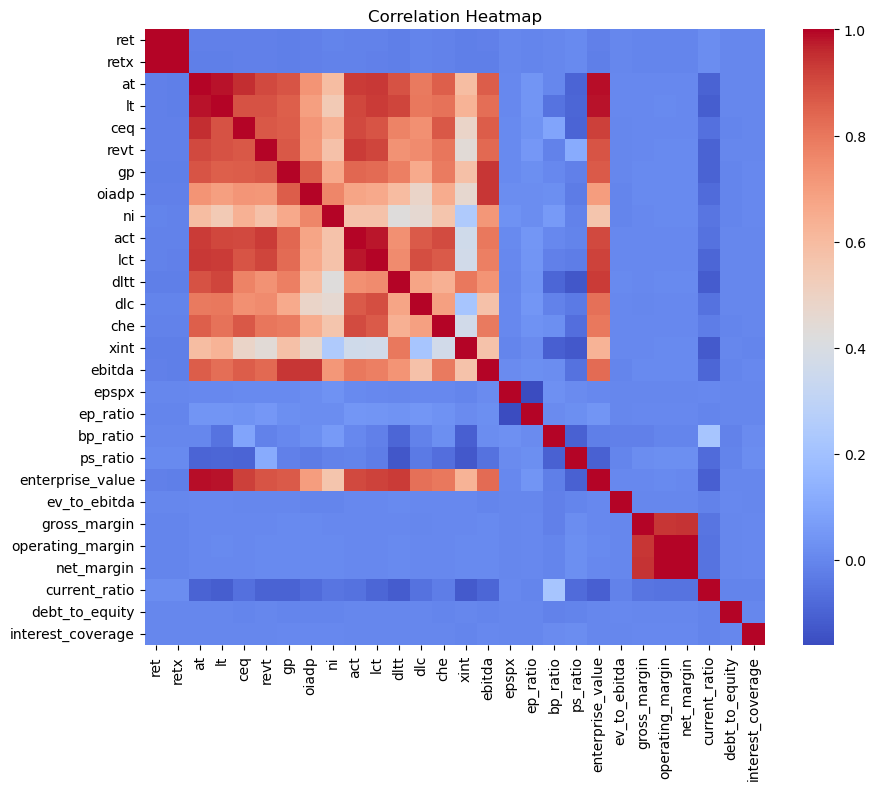

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

We try now to reduce the number of columns in the data due to the extreme high correlation with a lot of columns. Let's analyze using **VIF**.

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each numeric column in the cleaned data
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_columns_cleaned.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_columns_cleaned.values, i) for i in range(numeric_columns_cleaned.shape[1])]

/Users/saumkothari/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [14]:
vif_data

,feature,VIF
0,ret,623.618321
1,retx,622.618455
2,at,inf
3,lt,350.607859
4,ceq,134.483465
5,revt,17.877332
6,gp,15.007952
7,oiadp,18.862458
8,ni,2.913841
9,act,53.223816


In [15]:
# Identify columns with VIF < 10
low_vif_columns = vif_data[vif_data["VIF"] < 10]["feature"].tolist()

# Include essential columns regardless of VIF
essential_columns = ['ret', 'permno', 'date', 'tic']

# Create a new dataframe with the required columns
df = numeric_columns_cleaned[low_vif_columns].copy()
df[essential_columns] = data[essential_columns]

In [16]:
df = df[['permno', 'date', 'tic'] + [col for col in df.columns if col not in ['permno', 'date', 'tic']]]

In [17]:
df.columns

Index(['permno', 'date', 'tic', 'ni', 'xint', 'epspx', 'ep_ratio', 'bp_ratio',
       'ps_ratio', 'ev_to_ebitda', 'gross_margin', 'current_ratio',
       'debt_to_equity', 'interest_coverage', 'ret'],
      dtype='object')

Here’s a logical grouping of the remaining columns in the dataframe based on their nature and purpose:

---

### **1. Identification and Metadata**
- **permno**: Security identifier.
- **date**: Date of the record.
- **tic**: Stock ticker symbol.

---

### **2. Profitability and Returns**
- **ni**: Net Income (overall profitability).
- **gross_margin**: Core profitability percentage.
- **epspx**: Earnings Per Share (profit attributable to each share).

---

### **3. Valuation Metrics**
- **ep_ratio**: Earnings-to-Price Ratio.
- **bp_ratio**: Book-to-Price Ratio.
- **ps_ratio**: Price-to-Sales Ratio.
- **ev_to_ebitda**: Enterprise Value to EBITDA.

---

### **4. Liquidity and Solvency**
- **current_ratio**: Short-term financial health (liquidity).
- **debt_to_equity**: Debt reliance relative to equity.
- **interest_coverage**: Ability to meet interest payments with operating income.
- **xint**: Interest Expense (cost of borrowed funds).

---

### **5. Performance and Returns**
- **ret**: Total return of the stock, including dividends.

---

In [18]:
# Extract the year from the 'date' column
df['year'] = pd.to_datetime(df['date']).dt.year

# Count unique 'tic' values for each year
unique_tickers_per_year = df.groupby('year')['tic'].nunique()

# Display the results
unique_tickers_per_year

year
2013    1131
2014    1180
2015    1183
2016    1179
2017    1151
2018    1163
2019    1493
2020    1586
2021    1606
2022    1571
2023     304
Name: tic, dtype: int64

### Z-score Normalization

In [19]:
df_z = df.drop(columns=['ret', 'year'])

In [20]:
from scipy.stats import zscore

exclude_columns = ['tic', 'date', 'permno']

df_z_normalized = df_z.copy()
columns_to_normalize = [col for col in df_z.columns if col not in exclude_columns]
df_z_normalized[columns_to_normalize] = df_z_normalized[columns_to_normalize].apply(zscore)

In [21]:
df_z_normalized.head()

,permno,date,tic,ni,xint,epspx,ep_ratio,bp_ratio,ps_ratio,ev_to_ebitda,gross_margin,current_ratio,debt_to_equity,interest_coverage
0,10220,2013-12-31,BWXT,-0.015845,-0.389795,0.011865,-0.127063,0.327125,0.659841,-0.041848,0.015721,-0.207555,-0.038752,0.045554
1,10220,2014-12-31,BWXT,-0.171682,-0.377537,-0.025206,-0.117195,0.007552,0.308325,0.062021,0.014426,-0.085406,-0.031338,-0.010103
2,10220,2015-12-31,BWXT,-0.121452,-0.373852,-0.011403,-0.158547,-0.511755,0.309896,-0.028963,0.015694,-0.069867,-0.010898,-0.001782
3,10220,2016-12-31,BWXT,-0.096064,-0.378551,-0.005225,-0.153298,-0.832903,0.244642,-0.029892,0.016008,-0.194495,0.047820,0.004646
4,10220,2017-12-31,BWXT,-0.113392,-0.359139,-0.009168,-0.147250,-0.596195,0.243922,-0.032761,0.015981,-0.156826,0.005303,-0.000825


In [22]:
# Calculate the count of values > 3 or < -3 for each column
outlier_counts = df_z_normalized[columns_to_normalize].apply(
    lambda col: ((col > 3) | (col < -3)).sum()
)

# Create a dataframe to summarize the results
outlier_summary = pd.DataFrame(outlier_counts, columns=['Outlier Count'])
outlier_summary

,Outlier Count
ni,11053
xint,11900
epspx,723
ep_ratio,2755
bp_ratio,8772
ps_ratio,12912
ev_to_ebitda,2216
gross_margin,416
current_ratio,7968
debt_to_equity,2460


### Try using Modified Z-score (using Median)

In [23]:
# Define a function to calculate the Modified Z-Score
def modified_z_score(series):
    median = series.median()
    mad = (series - median).abs().median()
    return (0.6745 * (series - median)) / mad if mad != 0 else 0

# Apply the Modified Z-Score to numeric columns, excluding 'tic', 'date', and 'permno'
df_z_mod = df_z.copy()
columns_to_modify = [col for col in df_z.columns if col not in ['tic', 'date', 'permno']]
df_z_mod[columns_to_modify] = df_z_mod[columns_to_modify].apply(modified_z_score)

df_z_mod.head()

,permno,date,tic,ni,xint,epspx,ep_ratio,bp_ratio,ps_ratio,ev_to_ebitda,gross_margin,current_ratio,debt_to_equity,interest_coverage
0,10220,2013-12-31,BWXT,0.794325,-0.784223,0.610868,-0.510107,0.406101,1.353932,-1.092518,-0.246137,-0.051321,-1.057350,19.354132
1,10220,2014-12-31,BWXT,-0.541757,-0.719123,-0.585415,-0.422879,-0.098809,0.830449,2.741871,-0.759412,0.248494,-0.650198,-0.964565
2,10220,2015-12-31,BWXT,-0.111105,-0.699554,-0.139991,-0.788437,-0.919289,0.832789,-0.616872,-0.256855,0.286634,0.472264,2.073121
3,10220,2016-12-31,BWXT,0.106557,-0.724511,0.059390,-0.742030,-1.426687,0.735611,-0.651178,-0.132486,-0.019264,3.696772,4.419967
4,10220,2017-12-31,BWXT,-0.042003,-0.621418,-0.067874,-0.688564,-1.052700,0.734539,-0.757078,-0.143252,0.073195,1.361929,2.422654


In [24]:
# Calculate the count of values > 3 or < -3 for each column
outlier_counts = df_z_mod[columns_to_normalize].apply(
    lambda col: ((col > 3) | (col < -3)).sum()
)

# Create a dataframe to summarize the results
outlier_summary = pd.DataFrame(outlier_counts, columns=['Outlier Count'])
outlier_summary

,Outlier Count
ni,105714
xint,97049
epspx,61705
ep_ratio,50719
bp_ratio,21772
ps_ratio,43804
ev_to_ebitda,70190
gross_margin,13204
current_ratio,47369
debt_to_equity,120231


The modified Z-score has MANY more outliers and hence we stick to the original Z-score adjustment.

### Winsorization

In [25]:
df_z_normalized_capped = df_z_normalized.copy()
df_z_normalized_capped[columns_to_normalize] = df_z_normalized_capped[columns_to_normalize].clip(lower=-3, upper=3)

In [26]:
# Calculate the count of values > 3 or < -3 for each column
outlier_counts = df_z_normalized_capped[columns_to_normalize].apply(
    lambda col: ((col > 3) | (col < -3)).sum()
)

# Create a dataframe to summarize the results
outlier_summary = pd.DataFrame(outlier_counts, columns=['Outlier Count'])
outlier_summary

,Outlier Count
ni,0
xint,0
epspx,0
ep_ratio,0
bp_ratio,0
ps_ratio,0
ev_to_ebitda,0
gross_margin,0
current_ratio,0
debt_to_equity,0


In [27]:
from bayes_opt import BayesianOptimization
import numpy as np

df_z_normalized_capped['ret'] = df['ret']

### Training Data

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

df_z_normalized_capped['date'] = pd.to_datetime(df_z_normalized_capped['date'], errors='coerce')

# Filter the dataset for training (2013-2020)
training_data = df_z_normalized_capped[df_z_normalized_capped['date'].dt.year <= 2020]

# Define features and target variable
features = [
    'ni', 'gross_margin', 'epspx', 'ep_ratio', 'bp_ratio', 
    'ps_ratio', 'ev_to_ebitda', 'current_ratio', 
    'debt_to_equity', 'interest_coverage', 'xint'
]
target = 'ret'

X = training_data[features]
y = training_data[target]

# Fit a linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Extract the weights (coefficients)
feature_weights = pd.DataFrame({
    'Feature': features,
    'Weight': regression_model.coef_
})

feature_weights

,Feature,Weight
0,ni,-0.001073
1,gross_margin,-0.018806
2,epspx,-0.002462
3,ep_ratio,-0.002654
4,bp_ratio,-0.002652
5,ps_ratio,0.000667
6,ev_to_ebitda,0.000234
7,current_ratio,0.003909
8,debt_to_equity,-0.000200
9,interest_coverage,-0.003506


In [29]:
feature_weights['Normalized Weight'] = feature_weights['Weight'] / feature_weights['Weight'].sum()
feature_weights

,Feature,Weight,Normalized Weight
0,ni,-0.001073,0.033158
1,gross_margin,-0.018806,0.580917
2,epspx,-0.002462,0.076067
3,ep_ratio,-0.002654,0.081973
4,bp_ratio,-0.002652,0.081926
5,ps_ratio,0.000667,-0.020589
6,ev_to_ebitda,0.000234,-0.007242
7,current_ratio,0.003909,-0.120743
8,debt_to_equity,-0.000200,0.006184
9,interest_coverage,-0.003506,0.108287


In [30]:
# Create a training dataset (2013-2020)
training_data = df_z_normalized_capped[df_z_normalized_capped['date'].dt.year <= 2020].copy()

# Multiply the normalized weights to their respective features
for feature, weight in zip(feature_weights['Feature'], feature_weights['Normalized Weight']):
    training_data[feature] = training_data[feature] * weight
    
training_data

,permno,date,tic,ni,xint,epspx,ep_ratio,bp_ratio,ps_ratio,ev_to_ebitda,gross_margin,current_ratio,debt_to_equity,interest_coverage,ret
0,10220,2013-12-31,BWXT,-0.000525,-0.070187,0.000903,-0.010416,0.026800,-0.013585,0.000303,0.009133,0.025061,-0.000240,0.004933,0.016794
1,10220,2014-12-31,BWXT,-0.005693,-0.067980,-0.001917,-0.009607,0.000619,-0.006348,-0.000449,0.008381,0.010312,-0.000194,-0.001094,0.016794
2,10220,2015-12-31,BWXT,-0.004027,-0.067316,-0.000867,-0.012997,-0.041926,-0.006380,0.000210,0.009117,0.008436,-0.000067,-0.000193,0.016794
3,10220,2016-12-31,BWXT,-0.003185,-0.068162,-0.000397,-0.012566,-0.068237,-0.005037,0.000216,0.009299,0.023484,0.000296,0.000503,0.016794
4,10220,2017-12-31,BWXT,-0.003760,-0.064667,-0.000697,-0.012070,-0.048844,-0.005022,0.000237,0.009283,0.018936,0.000033,-0.000089,0.016794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875828,93427,2016-06-30,FN,-0.005162,-0.071676,-0.000457,-0.010240,0.081146,-0.010042,0.000187,0.007862,-0.039176,-0.000223,0.001298,0.044516
875829,93427,2017-06-30,FN,-0.004588,-0.070657,0.000443,-0.009133,0.084502,-0.017428,0.000222,0.007840,-0.035382,-0.000224,0.000529,0.044516
875830,93427,2018-06-30,FN,-0.004799,-0.070759,0.000073,-0.008794,0.090247,-0.013836,0.000211,0.007808,-0.070882,-0.000227,0.000433,0.044516
875831,93427,2019-06-30,FN,-0.004199,-0.069919,0.001103,-0.007443,0.092020,-0.013873,0.000240,0.007801,-0.077296,-0.000229,0.000241,0.044516


### Preparing the dollar-neutral portfolio

In [31]:
financial_metrics = [col for col in training_data.columns if col not in ['permno', 'tic', 'date', 'ret']]
df1 = training_data.groupby(['permno', 'tic'])[financial_metrics].mean().reset_index()

# Create df2: Each date becomes a column with the corresponding return value
df2 = training_data.pivot_table(
    index=['permno', 'tic'],
    columns='date',
    values='ret',
    fill_value=0
).reset_index()

In [32]:
df1

,permno,tic,ni,xint,epspx,ep_ratio,bp_ratio,ps_ratio,ev_to_ebitda,gross_margin,current_ratio,debt_to_equity,interest_coverage
0,10032,PLXS,-0.004762,-0.066056,0.000490,-0.001182,0.035814,-0.020781,0.000099,0.007665,-0.005061,-0.000192,-0.000547
1,10158,AMRC,-0.005761,-0.066304,-0.001647,-0.010954,0.005439,0.001460,-0.000303,0.008486,0.031989,-0.000070,-0.000936
2,10180,AKRXQ,-0.006393,-0.039740,-0.002241,-0.012489,-0.032724,0.012151,-0.000938,0.010670,-0.029786,0.000185,-0.000909
3,10182,TECD,-0.002452,-0.048371,0.003956,0.050603,-0.020426,-0.061766,-0.000209,0.007265,0.035024,-0.000182,-0.000468
4,10200,RGEN,-0.005509,-0.067397,-0.001397,-0.007897,0.117090,0.019799,-0.000060,0.011156,-0.206632,-0.000207,-0.000735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050,93422,QEP,-0.007654,-0.004241,-0.003564,-0.010174,0.030426,0.018142,0.000036,0.009270,0.051726,-0.000138,-0.001233
2051,93423,SIX,-0.005009,-0.026167,-0.001425,-0.008872,-0.123095,0.011636,0.000310,0.010043,0.057004,0.000944,-0.000901
2052,93427,FN,-0.004781,-0.071291,0.000168,-0.009905,0.093663,-0.013326,0.000216,0.007801,-0.067973,-0.000228,0.001440
2053,93429,CBOE,0.000723,-0.054009,0.001616,-0.002858,0.066466,0.009763,0.000176,0.009860,0.028089,-0.000187,-0.000144


In [33]:
df2

date,permno,tic,2013-01-31 00:00:00,2013-02-28 00:00:00,2013-03-31 00:00:00,2013-04-30 00:00:00,2013-05-31 00:00:00,2013-06-30 00:00:00,2013-07-31 00:00:00,2013-08-31 00:00:00,...,2020-03-31 00:00:00,2020-04-30 00:00:00,2020-05-31 00:00:00,2020-06-30 00:00:00,2020-07-31 00:00:00,2020-08-31 00:00:00,2020-09-30 00:00:00,2020-10-31 00:00:00,2020-11-30 00:00:00,2020-12-31 00:00:00
0,10032,PLXS,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.016715,0.0,0.0,0.000000
1,10158,AMRC,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.113265
2,10180,AKRXQ,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
3,10182,TECD,0.016773,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
4,10200,RGEN,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.030716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050,93422,QEP,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,-0.004460
2051,93423,SIX,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.012611
2052,93427,FN,0.000000,0.0,0.0,0.0,0.0,0.031808,0.0,0.0,...,0.0,0.0,0.0,0.031808,0.0,0.0,0.000000,0.0,0.0,0.000000
2053,93429,CBOE,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.016902


In [34]:
import wrds
import pandas as pd

# Establish the WRDS connection
db = wrds.Connection()

Enter your WRDS username [saumkothari]:sbk2171
Enter your password:········
WRDS recommends setting up a .pgpass file.
Create .pgpass file now [y/n]?: y
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


In [35]:
query = """
SELECT permno, date, ret
FROM crsp.msf
WHERE date BETWEEN '2013-01-01' AND '2020-12-31'
AND permno IN ({permnos})
"""
# Format the query to include permnos from df2
permnos = ', '.join(str(p) for p in df2['permno'].unique())
formatted_query = query.format(permnos=permnos)

# Execute the query and fetch data
crsp_data = db.raw_sql(formatted_query)

# Ensure the date column is in datetime format
crsp_data['date'] = pd.to_datetime(crsp_data['date'])

# Calculate the mean return for each permno at the end of each month
crsp_data['month_end'] = crsp_data['date'] + pd.offsets.MonthEnd(0)
mean_returns = crsp_data.groupby(['permno', 'month_end'])['ret'].mean().reset_index()

# Display the resulting dataframe
print(mean_returns)

        permno  month_end       ret
0        10032 2013-01-31 -0.010853
1        10032 2013-02-28 -0.045455
2        10032 2013-03-31 -0.002053
3        10032 2013-04-30  0.109420
4        10032 2013-05-31  0.081943
...        ...        ...       ...
144064   93436 2020-08-31  0.741452
144065   93436 2020-09-30 -0.139087
144066   93436 2020-10-31 -0.095499
144067   93436 2020-11-30  0.462736
144068   93436 2020-12-31  0.243252

[144069 rows x 3 columns]


In [36]:
df2_transformed = mean_returns.pivot_table(
    index='permno', 
    columns='month_end', 
    values='ret', 
    aggfunc='first', 
    fill_value=0  # Fill missing values with 0
).reset_index()

# Add 'tic' column by mapping from the original df2 (if available)
if 'tic' in df2.columns:
    permno_to_tic = df2.set_index('permno')['tic'].to_dict()
    df2_transformed['tic'] = df2_transformed['permno'].map(permno_to_tic)

# Reorganize columns to match the desired format
columns_order = ['permno', 'tic'] + [col for col in df2_transformed.columns if col not in ['permno', 'tic']]
df2_transformed = df2_transformed[columns_order]
df2_transformed

month_end,permno,tic,2013-01-31 00:00:00,2013-02-28 00:00:00,2013-03-31 00:00:00,2013-04-30 00:00:00,2013-05-31 00:00:00,2013-06-30 00:00:00,2013-07-31 00:00:00,2013-08-31 00:00:00,...,2020-03-31 00:00:00,2020-04-30 00:00:00,2020-05-31 00:00:00,2020-06-30 00:00:00,2020-07-31 00:00:00,2020-08-31 00:00:00,2020-09-30 00:00:00,2020-10-31 00:00:00,2020-11-30 00:00:00,2020-12-31 00:00:00
0,10032,PLXS,-0.010853,-0.045455,-0.002053,0.109420,0.081943,0.024332,0.169957,-0.063769,...,-0.177694,0.149010,0.024406,0.098723,0.052863,0.023960,-0.071513,-0.015433,0.074346,0.046848
1,10158,AMRC,0.003058,-0.155488,-0.109507,-0.004054,0.120760,0.090799,0.014428,-0.063457,...,-0.244454,0.060481,0.188261,0.294501,-0.003600,0.233381,-0.021675,0.149401,0.160458,0.172615
2,10180,AKRXQ,-0.020210,0.055004,0.001448,0.088214,-0.034552,-0.069511,0.049556,0.266385,...,-0.516207,-0.625802,-0.571429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,10182,TECD,0.118164,0.042231,-0.140784,0.025006,0.072544,-0.060455,0.091527,-0.043580,...,-0.081045,0.074818,-0.031286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,10200,RGEN,0.098726,-0.097102,0.109149,0.296672,-0.075893,-0.004831,0.234223,-0.040315,...,0.127804,0.203128,0.127594,-0.056196,0.220856,0.026506,-0.047576,0.128982,0.138680,0.010334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,93422,QEP,-0.030393,0.038501,0.045305,-0.098304,-0.011494,-0.020451,0.097552,-0.103313,...,-0.842444,1.947683,-0.134280,0.511246,0.139535,-0.115646,-0.305538,-0.003102,0.788889,0.484472
1915,93423,SIX,0.028431,0.075786,0.084868,0.005381,0.035680,-0.056993,0.046360,-0.090514,...,-0.494066,0.595694,0.148426,-0.164056,-0.094742,0.249569,-0.065808,0.065025,0.421369,0.109665
1916,93427,FN,0.114155,0.120902,-0.109689,-0.060233,0.058267,-0.036476,0.057857,-0.057394,...,-0.010160,0.150110,0.018964,-0.023772,0.163569,-0.039240,-0.096733,-0.047755,0.138121,0.135851
1917,93429,CBOE,0.150034,0.064640,0.028396,0.015972,0.073541,0.161933,0.074185,-0.080439,...,-0.217105,0.113501,0.074864,-0.123802,-0.059820,0.051425,-0.044123,-0.073513,0.128552,0.019711


In [37]:
# Identify 'tic' and 'permno' pairs in df1 but not in df2_transformed
df1_tic_permno = set(zip(df1['tic'], df1['permno']))
df2_tic_permno = set(zip(df2_transformed['tic'], df2_transformed['permno']))

# Find the difference
missing_tic_permno = df1_tic_permno - df2_tic_permno

# Convert the result to a dataframe for better readability
missing_tic_permno_df = pd.DataFrame(list(missing_tic_permno), columns=['tic', 'permno'])

# Display the missing pairs
#import ace_tools as tools; tools.display_dataframe_to_user(name="TIC and PERMNO Missing in df2_transformed", dataframe=missing_tic_permno_df)
missing_tic_permno_df

,tic,permno
0,MWV,21186
1,CERT,20195
2,ADRO,15282
3,MLNK,21613
4,AU,24295
...,...,...
131,IAC,78840
132,BIOS.1,83883
133,AGTI,20901
134,EDR,20923


In [38]:
# Filter df1 to keep only tic and permno pairs present in df2_transformed
valid_tic_permno = df2_tic_permno
df1_filtered = df1[df1.apply(lambda row: (row['tic'], row['permno']) in valid_tic_permno, axis=1)]

df1_filtered

,permno,tic,ni,xint,epspx,ep_ratio,bp_ratio,ps_ratio,ev_to_ebitda,gross_margin,current_ratio,debt_to_equity,interest_coverage
0,10032,PLXS,-0.004762,-0.066056,0.000490,-0.001182,0.035814,-0.020781,0.000099,0.007665,-0.005061,-0.000192,-0.000547
1,10158,AMRC,-0.005761,-0.066304,-0.001647,-0.010954,0.005439,0.001460,-0.000303,0.008486,0.031989,-0.000070,-0.000936
2,10180,AKRXQ,-0.006393,-0.039740,-0.002241,-0.012489,-0.032724,0.012151,-0.000938,0.010670,-0.029786,0.000185,-0.000909
3,10182,TECD,-0.002452,-0.048371,0.003956,0.050603,-0.020426,-0.061766,-0.000209,0.007265,0.035024,-0.000182,-0.000468
4,10200,RGEN,-0.005509,-0.067397,-0.001397,-0.007897,0.117090,0.019799,-0.000060,0.011156,-0.206632,-0.000207,-0.000735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050,93422,QEP,-0.007654,-0.004241,-0.003564,-0.010174,0.030426,0.018142,0.000036,0.009270,0.051726,-0.000138,-0.001233
2051,93423,SIX,-0.005009,-0.026167,-0.001425,-0.008872,-0.123095,0.011636,0.000310,0.010043,0.057004,0.000944,-0.000901
2052,93427,FN,-0.004781,-0.071291,0.000168,-0.009905,0.093663,-0.013326,0.000216,0.007801,-0.067973,-0.000228,0.001440
2053,93429,CBOE,0.000723,-0.054009,0.001616,-0.002858,0.066466,0.009763,0.000176,0.009860,0.028089,-0.000187,-0.000144


In [39]:
df1 = df1_filtered
df2 = df2_transformed

In [40]:
# Rename columns in df2 after 'tic' and 'permno' to sequential integers starting from 1
new_column_names = ['permno', 'tic'] + list(range(1, len(df2.columns) - 1))
df2.columns = new_column_names
df2

,permno,tic,1,2,3,4,5,6,7,8,...,87,88,89,90,91,92,93,94,95,96
0,10032,PLXS,-0.010853,-0.045455,-0.002053,0.109420,0.081943,0.024332,0.169957,-0.063769,...,-0.177694,0.149010,0.024406,0.098723,0.052863,0.023960,-0.071513,-0.015433,0.074346,0.046848
1,10158,AMRC,0.003058,-0.155488,-0.109507,-0.004054,0.120760,0.090799,0.014428,-0.063457,...,-0.244454,0.060481,0.188261,0.294501,-0.003600,0.233381,-0.021675,0.149401,0.160458,0.172615
2,10180,AKRXQ,-0.020210,0.055004,0.001448,0.088214,-0.034552,-0.069511,0.049556,0.266385,...,-0.516207,-0.625802,-0.571429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,10182,TECD,0.118164,0.042231,-0.140784,0.025006,0.072544,-0.060455,0.091527,-0.043580,...,-0.081045,0.074818,-0.031286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,10200,RGEN,0.098726,-0.097102,0.109149,0.296672,-0.075893,-0.004831,0.234223,-0.040315,...,0.127804,0.203128,0.127594,-0.056196,0.220856,0.026506,-0.047576,0.128982,0.138680,0.010334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,93422,QEP,-0.030393,0.038501,0.045305,-0.098304,-0.011494,-0.020451,0.097552,-0.103313,...,-0.842444,1.947683,-0.134280,0.511246,0.139535,-0.115646,-0.305538,-0.003102,0.788889,0.484472
1915,93423,SIX,0.028431,0.075786,0.084868,0.005381,0.035680,-0.056993,0.046360,-0.090514,...,-0.494066,0.595694,0.148426,-0.164056,-0.094742,0.249569,-0.065808,0.065025,0.421369,0.109665
1916,93427,FN,0.114155,0.120902,-0.109689,-0.060233,0.058267,-0.036476,0.057857,-0.057394,...,-0.010160,0.150110,0.018964,-0.023772,0.163569,-0.039240,-0.096733,-0.047755,0.138121,0.135851
1917,93429,CBOE,0.150034,0.064640,0.028396,0.015972,0.073541,0.161933,0.074185,-0.080439,...,-0.217105,0.113501,0.074864,-0.123802,-0.059820,0.051425,-0.044123,-0.073513,0.128552,0.019711


In [41]:
# Drop the 'permno' column from df1 and df2
df1 = df1.drop(columns=['permno'], errors='ignore')
df2 = df2.drop(columns=['permno'], errors='ignore')

In [42]:
df1

,tic,ni,xint,epspx,ep_ratio,bp_ratio,ps_ratio,ev_to_ebitda,gross_margin,current_ratio,debt_to_equity,interest_coverage
0,PLXS,-0.004762,-0.066056,0.000490,-0.001182,0.035814,-0.020781,0.000099,0.007665,-0.005061,-0.000192,-0.000547
1,AMRC,-0.005761,-0.066304,-0.001647,-0.010954,0.005439,0.001460,-0.000303,0.008486,0.031989,-0.000070,-0.000936
2,AKRXQ,-0.006393,-0.039740,-0.002241,-0.012489,-0.032724,0.012151,-0.000938,0.010670,-0.029786,0.000185,-0.000909
3,TECD,-0.002452,-0.048371,0.003956,0.050603,-0.020426,-0.061766,-0.000209,0.007265,0.035024,-0.000182,-0.000468
4,RGEN,-0.005509,-0.067397,-0.001397,-0.007897,0.117090,0.019799,-0.000060,0.011156,-0.206632,-0.000207,-0.000735
...,...,...,...,...,...,...,...,...,...,...,...,...
2050,QEP,-0.007654,-0.004241,-0.003564,-0.010174,0.030426,0.018142,0.000036,0.009270,0.051726,-0.000138,-0.001233
2051,SIX,-0.005009,-0.026167,-0.001425,-0.008872,-0.123095,0.011636,0.000310,0.010043,0.057004,0.000944,-0.000901
2052,FN,-0.004781,-0.071291,0.000168,-0.009905,0.093663,-0.013326,0.000216,0.007801,-0.067973,-0.000228,0.001440
2053,CBOE,0.000723,-0.054009,0.001616,-0.002858,0.066466,0.009763,0.000176,0.009860,0.028089,-0.000187,-0.000144


In [43]:
df2.head()

,tic,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,PLXS,-0.010853,-0.045455,-0.002053,0.109420,0.081943,0.024332,0.169957,-0.063769,0.135003,...,-0.177694,0.149010,0.024406,0.098723,0.052863,0.023960,-0.071513,-0.015433,0.074346,0.046848
1,AMRC,0.003058,-0.155488,-0.109507,-0.004054,0.120760,0.090799,0.014428,-0.063457,0.170561,...,-0.244454,0.060481,0.188261,0.294501,-0.003600,0.233381,-0.021675,0.149401,0.160458,0.172615
2,AKRXQ,-0.020210,0.055004,0.001448,0.088214,-0.034552,-0.069511,0.049556,0.266385,0.095159,...,-0.516207,-0.625802,-0.571429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,TECD,0.118164,0.042231,-0.140784,0.025006,0.072544,-0.060455,0.091527,-0.043580,0.015256,...,-0.081045,0.074818,-0.031286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,RGEN,0.098726,-0.097102,0.109149,0.296672,-0.075893,-0.004831,0.234223,-0.040315,0.136270,...,0.127804,0.203128,0.127594,-0.056196,0.220856,0.026506,-0.047576,0.128982,0.138680,0.010334


In [44]:
df2 = pd.read_csv('df2.csv')

ret = df2[[str(i) for i in range(1,97)]].mean(axis=1)*12 #mean vector (annualized)
df1['ret'] = ret

In [45]:
ret

0       0.171598
1       0.302227
2      -0.279527
3       0.177507
4       0.517226
          ...   
1914    0.109924
1915    0.155724
1916    0.292648
1917    0.187711
1918    0.781972
Length: 1919, dtype: float64

In [46]:
cov = df2[[str(i) for i in range(1,97)]].T.cov()*12 #variance-covariance matrix (annualized)
ret.shape, cov.shape

((1919,), (1919, 1919))

#### Optimization criteria

In [47]:
ret_ = ret.to_numpy().reshape(1,-1)
cov_ = cov.to_numpy()

N = 1919
A = 2 # risk aversion parameter A

In [48]:
import numpy as np
import cvxpy as cp

# Ensure the covariance matrix is positive semidefinite
epsilon = 1e-6
cov_ = cov_.copy() + epsilon * np.eye(cov_.shape[0])

# Variables
w = cp.Variable(N)

# Define the objective
mu = ret_ @ w  # Expected return
risk = cp.quad_form(w, cov_)  # Risk (variance)

objective = cp.Maximize(mu - A * risk)

# Define the constraints
constraints = [cp.sum(w) == 0,  # Market neutrality
               w >= -1,         # Short constraints
               w <= 1]          # Long constraints

# Solve the problem
prob = cp.Problem(objective, constraints)
prob.solve()

# Extract optimal weights
optimal_weights = w.value

# Normalize weights for positive and negative positions
positive_weights = np.maximum(optimal_weights, 0)
negative_weights = np.minimum(optimal_weights, 0)

positive_weights /= positive_weights.sum()
negative_weights /= -negative_weights.sum()

print(f"Positive Weights Sum to: {positive_weights.sum():.4f}")
print(f"Negative Weights Sum to: {negative_weights.sum():.4f}")

Positive Weights Sum to: 1.0000
Negative Weights Sum to: -1.0000


In [49]:
print(mu.value, cp.sqrt(risk).value)

[149.9901647] 0.5621970554554586


In [50]:
print("Optimal Weights (Normalized):")
print("\nPositive weights:", positive_weights)
print("\nNegative weights:", negative_weights)

Optimal Weights (Normalized):

Positive weights: [0.00106833 0.         0.         ... 0.00106833 0.00106834 0.00106833]

Negative weights: [ 0.         -0.00106833 -0.00106833 ...  0.          0.
  0.        ]


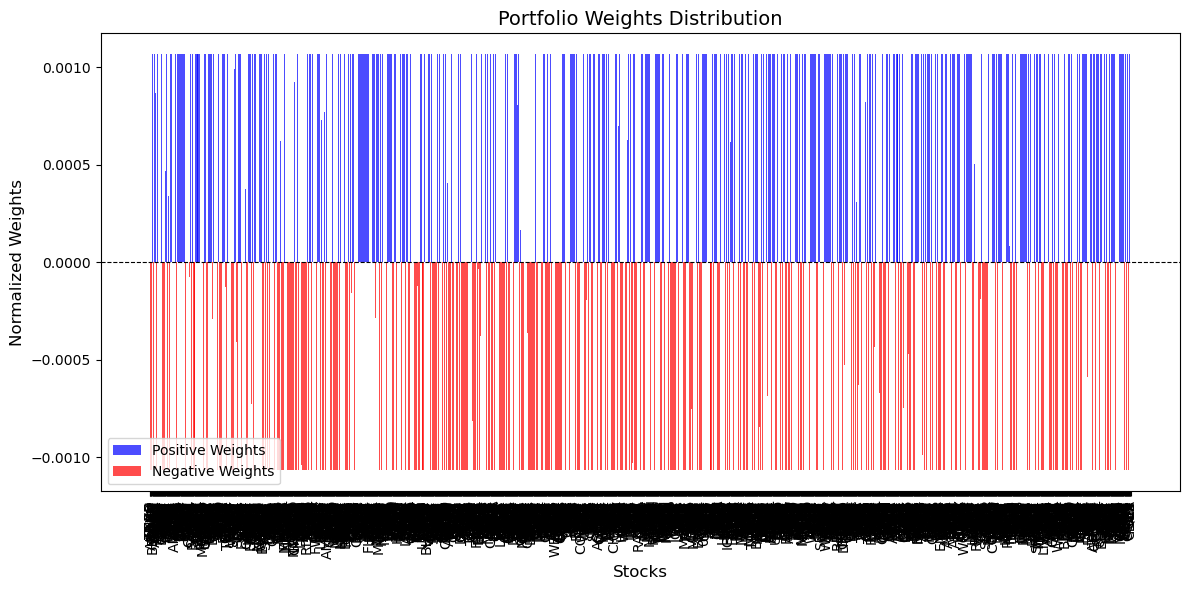

In [51]:
import matplotlib.pyplot as plt
import numpy as np

tickers = df1['tic'].values

plt.figure(figsize=(12, 6))

plt.bar(tickers, positive_weights, label="Positive Weights", color="blue", alpha=0.7)
plt.bar(tickers, negative_weights, label="Negative Weights", color="red", alpha=0.7)

plt.xlabel("Stocks", fontsize=12)
plt.ylabel("Normalized Weights", fontsize=12)
plt.title("Portfolio Weights Distribution", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.axhline(0, color='black', linewidth=0.8, linestyle="--")
plt.legend()
plt.tight_layout()

plt.show()

In [52]:
# Calculate the Sharpe Ratio
# Sharpe Ratio = (Expected Return - Risk-Free Rate) / Portfolio Volatility
risk_free_rate = 0.04

# Calculate the expected return and risk (portfolio volatility)
expected_return = (ret_ @ optimal_weights)/100
portfolio_variance = optimal_weights.T @ cov_ @ optimal_weights
portfolio_volatility = np.sqrt(portfolio_variance)

# Compute Sharpe Ratio
sharpe_ratio = (expected_return - risk_free_rate) / portfolio_volatility

print(f"Sharpe Ratio: {sharpe_ratio[0]:.4f}")  # Sharpe ratio is a single value

Sharpe Ratio: 2.5968


### Validation Set Data

In [53]:
validation_data = df_z_normalized_capped[
    (df_z_normalized_capped['date'].dt.year >= 2021) &
    (df_z_normalized_capped['date'].dt.year <= 2022)
].copy()

# Apply the feature weights to the validation set
# Ensure the same features as in the training data are used
for feature, weight in zip(feature_weights['Feature'], feature_weights['Normalized Weight']):
    validation_data[feature] = validation_data[feature] * weight
    
validation_data

,permno,date,tic,ni,xint,epspx,ep_ratio,bp_ratio,ps_ratio,ev_to_ebitda,gross_margin,current_ratio,debt_to_equity,interest_coverage,ret
8,10220,2021-12-31,BWXT,-0.001181,-0.050291,0.001053,-0.009539,-0.025030,-0.000870,0.000109,0.008957,0.017136,0.000049,-0.000706,0.016794
9,10220,2022-12-31,BWXT,-0.002286,-0.046953,0.000413,-0.008966,-0.016646,-0.000978,0.000092,0.008873,-0.007506,0.000028,-0.000756,0.016794
34,10693,2021-12-31,EHC,0.000554,0.009641,0.001962,0.002140,-0.018624,0.002376,0.000113,0.008618,0.044085,0.000043,-0.000808,0.130270
35,10693,2022-12-31,EHC,-0.001750,0.005950,0.000393,-0.002095,-0.031050,0.001575,0.000101,0.008549,0.043201,0.000109,-0.000864,0.130270
52,10874,2021-12-31,BC,0.003508,-0.039292,0.005462,0.002368,0.001505,-0.008064,0.000200,0.009112,0.029647,-0.000087,-0.000401,0.243039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875815,93380,2022-12-31,JKS,-0.004704,0.006448,-0.000367,0.070536,-0.053258,0.001780,-0.000899,0.008142,0.054692,0.000208,-0.001041,0.009512
875823,93423,2021-12-31,SIX,-0.004052,-0.000107,-0.000667,-0.007282,-0.183393,0.010061,0.000077,0.010346,0.051018,-0.000680,-0.000931,0.251256
875824,93423,2022-12-31,SIX,-0.004395,-0.004690,-0.000897,-0.008148,-0.190346,0.009825,0.000083,0.010320,0.084311,-0.000652,-0.000930,0.251256
875833,93427,2021-06-30,FN,-0.003752,-0.071945,0.001832,-0.004798,0.092246,-0.010748,0.000231,0.007839,-0.063801,-0.000234,0.006718,0.044516


In [54]:
financial_metrics = [col for col in training_data.columns if col not in ['permno', 'tic', 'date', 'ret']]
df1 = training_data.groupby(['permno', 'tic'])[financial_metrics].mean().reset_index()

# Create df2: Each date becomes a column with the corresponding return value
df2 = training_data.pivot_table(
    index=['permno', 'tic'],
    columns='date',
    values='ret',
    fill_value=0
).reset_index()

In [55]:
query = """
SELECT permno, date, ret
FROM crsp.msf
WHERE date BETWEEN '2021-01-01' AND '2022-12-31'
AND permno IN ({permnos})
"""
# Format the query to include permnos from df2
permnos = ', '.join(str(p) for p in df2['permno'].unique())
formatted_query = query.format(permnos=permnos)

# Execute the query and fetch data
crsp_data = db.raw_sql(formatted_query)

# Ensure the date column is in datetime format
crsp_data['date'] = pd.to_datetime(crsp_data['date'])

# Calculate the mean return for each permno at the end of each month
crsp_data['month_end'] = crsp_data['date'] + pd.offsets.MonthEnd(0)
mean_returns = crsp_data.groupby(['permno', 'month_end'])['ret'].mean().reset_index()

# Display the resulting dataframe
print(mean_returns)

       permno  month_end       ret
0       10032 2021-01-31 -0.016494
1       10032 2021-02-28  0.091784
2       10032 2021-03-31  0.093594
3       10032 2021-04-30  0.006533
4       10032 2021-05-31  0.068910
...       ...        ...       ...
38061   93436 2022-08-31 -0.072489
38062   93436 2022-09-30 -0.037589
38063   93436 2022-10-31 -0.142168
38064   93436 2022-11-30 -0.144326
38065   93436 2022-12-31 -0.367334

[38066 rows x 3 columns]


In [56]:
df2_transformed = mean_returns.pivot_table(
    index='permno', 
    columns='month_end', 
    values='ret', 
    aggfunc='first', 
    fill_value=0  # Fill missing values with 0
).reset_index()

# Add 'tic' column by mapping from the original df2 (if available)
if 'tic' in df2.columns:
    permno_to_tic = df2.set_index('permno')['tic'].to_dict()
    df2_transformed['tic'] = df2_transformed['permno'].map(permno_to_tic)

# Reorganize columns to match the desired format
columns_order = ['permno', 'tic'] + [col for col in df2_transformed.columns if col not in ['permno', 'tic']]
df2_transformed = df2_transformed[columns_order]
df2_transformed

month_end,permno,tic,2021-01-31 00:00:00,2021-02-28 00:00:00,2021-03-31 00:00:00,2021-04-30 00:00:00,2021-05-31 00:00:00,2021-06-30 00:00:00,2021-07-31 00:00:00,2021-08-31 00:00:00,...,2022-03-31 00:00:00,2022-04-30 00:00:00,2022-05-31 00:00:00,2022-06-30 00:00:00,2022-07-31 00:00:00,2022-08-31 00:00:00,2022-09-30 00:00:00,2022-10-31 00:00:00,2022-11-30 00:00:00,2022-12-31 00:00:00
0,10032,PLXS,-0.016494,0.091784,0.093594,0.006533,0.068910,-0.074891,-0.011924,0.016718,...,0.004173,-0.008190,0.045107,-0.074293,0.196815,-0.002342,-0.065827,0.123801,0.120122,-0.066141
1,10158,AMRC,0.073698,0.018363,-0.148634,0.085544,0.018375,0.166667,0.092634,0.009047,...,0.237354,-0.365535,0.164155,-0.224114,0.255926,0.203251,-0.034423,-0.090253,0.083333,-0.127900
2,10200,RGEN,0.043678,0.061950,-0.084656,0.088987,-0.137452,0.093149,0.230839,0.151730,...,-0.043772,-0.164017,0.045981,-0.012586,0.313793,0.028168,-0.147057,-0.024691,-0.020001,-0.053288
3,10220,BWXT,-0.105508,0.075853,0.140321,0.014862,-0.062313,-0.070675,-0.011872,0.003657,...,0.012355,-0.036019,-0.009630,0.075977,0.028862,-0.076394,-0.033762,0.131229,0.072482,-0.046149
4,10318,BCPC,-0.071081,0.115201,0.050687,0.014193,0.029955,0.001985,0.027655,0.040996,...,-0.011855,-0.098756,0.009984,0.042675,0.046400,-0.029022,-0.077682,0.149860,0.007153,-0.127699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,93422,QEP,0.192469,0.207018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1659,93423,SIX,0.002933,0.304093,0.041928,0.010975,-0.032993,-0.047326,-0.039972,0.016607,...,-0.003665,-0.120230,-0.233081,-0.260647,0.044700,-0.022938,-0.200903,0.259887,0.080269,-0.034869
1660,93427,FN,0.017399,0.118951,0.023322,-0.052771,0.047536,0.068904,-0.014082,0.089928,...,0.049935,-0.066014,-0.115287,-0.066421,0.184464,0.070581,-0.071859,0.198533,0.166171,-0.038903
1661,93429,CBOE,-0.014927,0.083397,-0.002728,0.057554,0.070423,0.069632,-0.004872,0.068878,...,-0.024469,-0.012585,-0.001682,0.007836,0.090026,-0.039958,-0.005086,0.060748,0.022811,-0.010801


In [57]:
# Identify 'tic' and 'permno' pairs in df1 but not in df2_transformed
df1_tic_permno = set(zip(df1['tic'], df1['permno']))
df2_tic_permno = set(zip(df2_transformed['tic'], df2_transformed['permno']))

# Find the difference
missing_tic_permno = df1_tic_permno - df2_tic_permno

# Convert the result to a dataframe for better readability
missing_tic_permno_df = pd.DataFrame(list(missing_tic_permno), columns=['tic', 'permno'])

# Display the missing pairs
#import ace_tools as tools; tools.display_dataframe_to_user(name="TIC and PERMNO Missing in df2_transformed", dataframe=missing_tic_permno_df)
missing_tic_permno_df

,tic,permno
0,KS,92044
1,LEXEA,16429
2,EFII,77971
3,TIF,75100
4,MFRM.1,13110
...,...,...
387,SCG,23085
388,BEAV,76138
389,IAC,78840
390,JNS,88313


In [58]:
# Filter df1 to keep only tic and permno pairs present in df2_transformed
valid_tic_permno = df2_tic_permno
df1_filtered = df1[df1.apply(lambda row: (row['tic'], row['permno']) in valid_tic_permno, axis=1)]

df1_filtered

,permno,tic,ni,xint,epspx,ep_ratio,bp_ratio,ps_ratio,ev_to_ebitda,gross_margin,current_ratio,debt_to_equity,interest_coverage
0,10032,PLXS,-0.004762,-0.066056,0.000490,-0.001182,0.035814,-0.020781,0.000099,0.007665,-0.005061,-0.000192,-0.000547
1,10158,AMRC,-0.005761,-0.066304,-0.001647,-0.010954,0.005439,0.001460,-0.000303,0.008486,0.031989,-0.000070,-0.000936
4,10200,RGEN,-0.005509,-0.067397,-0.001397,-0.007897,0.117090,0.019799,-0.000060,0.011156,-0.206632,-0.000207,-0.000735
5,10220,BWXT,-0.002934,-0.062879,-0.000221,-0.011426,-0.030593,-0.006678,0.000133,0.009058,0.021640,0.000020,0.000279
8,10318,BCPC,-0.005022,-0.069268,0.000043,-0.008152,0.064942,0.006889,0.000147,0.009472,-0.017996,-0.000165,-0.000235
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050,93422,QEP,-0.007654,-0.004241,-0.003564,-0.010174,0.030426,0.018142,0.000036,0.009270,0.051726,-0.000138,-0.001233
2051,93423,SIX,-0.005009,-0.026167,-0.001425,-0.008872,-0.123095,0.011636,0.000310,0.010043,0.057004,0.000944,-0.000901
2052,93427,FN,-0.004781,-0.071291,0.000168,-0.009905,0.093663,-0.013326,0.000216,0.007801,-0.067973,-0.000228,0.001440
2053,93429,CBOE,0.000723,-0.054009,0.001616,-0.002858,0.066466,0.009763,0.000176,0.009860,0.028089,-0.000187,-0.000144


In [59]:
df1 = df1_filtered
df2 = df2_transformed

In [60]:
# Rename columns in df2 after 'tic' and 'permno' to sequential integers starting from 1
new_column_names = ['permno', 'tic'] + list(range(1, len(df2.columns) - 1))
df2.columns = new_column_names
df2

,permno,tic,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,10032,PLXS,-0.016494,0.091784,0.093594,0.006533,0.068910,-0.074891,-0.011924,0.016718,...,0.004173,-0.008190,0.045107,-0.074293,0.196815,-0.002342,-0.065827,0.123801,0.120122,-0.066141
1,10158,AMRC,0.073698,0.018363,-0.148634,0.085544,0.018375,0.166667,0.092634,0.009047,...,0.237354,-0.365535,0.164155,-0.224114,0.255926,0.203251,-0.034423,-0.090253,0.083333,-0.127900
2,10200,RGEN,0.043678,0.061950,-0.084656,0.088987,-0.137452,0.093149,0.230839,0.151730,...,-0.043772,-0.164017,0.045981,-0.012586,0.313793,0.028168,-0.147057,-0.024691,-0.020001,-0.053288
3,10220,BWXT,-0.105508,0.075853,0.140321,0.014862,-0.062313,-0.070675,-0.011872,0.003657,...,0.012355,-0.036019,-0.009630,0.075977,0.028862,-0.076394,-0.033762,0.131229,0.072482,-0.046149
4,10318,BCPC,-0.071081,0.115201,0.050687,0.014193,0.029955,0.001985,0.027655,0.040996,...,-0.011855,-0.098756,0.009984,0.042675,0.046400,-0.029022,-0.077682,0.149860,0.007153,-0.127699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,93422,QEP,0.192469,0.207018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1659,93423,SIX,0.002933,0.304093,0.041928,0.010975,-0.032993,-0.047326,-0.039972,0.016607,...,-0.003665,-0.120230,-0.233081,-0.260647,0.044700,-0.022938,-0.200903,0.259887,0.080269,-0.034869
1660,93427,FN,0.017399,0.118951,0.023322,-0.052771,0.047536,0.068904,-0.014082,0.089928,...,0.049935,-0.066014,-0.115287,-0.066421,0.184464,0.070581,-0.071859,0.198533,0.166171,-0.038903
1661,93429,CBOE,-0.014927,0.083397,-0.002728,0.057554,0.070423,0.069632,-0.004872,0.068878,...,-0.024469,-0.012585,-0.001682,0.007836,0.090026,-0.039958,-0.005086,0.060748,0.022811,-0.010801


In [61]:
# Drop the 'permno' column from df1 and df2
df1 = df1.drop(columns=['permno'], errors='ignore')
df2 = df2.drop(columns=['permno'], errors='ignore')

df2

,tic,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,PLXS,-0.016494,0.091784,0.093594,0.006533,0.068910,-0.074891,-0.011924,0.016718,-0.026353,...,0.004173,-0.008190,0.045107,-0.074293,0.196815,-0.002342,-0.065827,0.123801,0.120122,-0.066141
1,AMRC,0.073698,0.018363,-0.148634,0.085544,0.018375,0.166667,0.092634,0.009047,-0.155025,...,0.237354,-0.365535,0.164155,-0.224114,0.255926,0.203251,-0.034423,-0.090253,0.083333,-0.127900
2,RGEN,0.043678,0.061950,-0.084656,0.088987,-0.137452,0.093149,0.230839,0.151730,0.021238,...,-0.043772,-0.164017,0.045981,-0.012586,0.313793,0.028168,-0.147057,-0.024691,-0.020001,-0.053288
3,BWXT,-0.105508,0.075853,0.140321,0.014862,-0.062313,-0.070675,-0.011872,0.003657,-0.062163,...,0.012355,-0.036019,-0.009630,0.075977,0.028862,-0.076394,-0.033762,0.131229,0.072482,-0.046149
4,BCPC,-0.071081,0.115201,0.050687,0.014193,0.029955,0.001985,0.027655,0.040996,0.033115,...,-0.011855,-0.098756,0.009984,0.042675,0.046400,-0.029022,-0.077682,0.149860,0.007153,-0.127699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,QEP,0.192469,0.207018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1659,SIX,0.002933,0.304093,0.041928,0.010975,-0.032993,-0.047326,-0.039972,0.016607,0.006155,...,-0.003665,-0.120230,-0.233081,-0.260647,0.044700,-0.022938,-0.200903,0.259887,0.080269,-0.034869
1660,FN,0.017399,0.118951,0.023322,-0.052771,0.047536,0.068904,-0.014082,0.089928,-0.004950,...,0.049935,-0.066014,-0.115287,-0.066421,0.184464,0.070581,-0.071859,0.198533,0.166171,-0.038903
1661,CBOE,-0.014927,0.083397,-0.002728,0.057554,0.070423,0.069632,-0.004872,0.068878,-0.018153,...,-0.024469,-0.012585,-0.001682,0.007836,0.090026,-0.039958,-0.005086,0.060748,0.022811,-0.010801


In [62]:
df2.to_csv('df2-1.csv', index=False)

In [63]:
df2 = pd.read_csv('df2-1.csv')

ret = df2[[str(i) for i in range(1,24)]].mean(axis=1)*12 #mean vector (annualized)
df1['ret'] = ret

In [64]:
ret

0       0.222510
1       0.359141
2       0.053098
3       0.061921
4       0.131980
          ...   
1658    0.208428
1659   -0.073013
1660    0.336040
1661    0.191407
1662    0.034379
Length: 1663, dtype: float64

In [65]:
cov = df2[[str(i) for i in range(1,24)]].T.cov()*12 #variance-covariance matrix (annualized)
ret.shape, cov.shape

((1663,), (1663, 1663))

In [66]:
ret_ = ret.to_numpy().reshape(1,-1)
cov_ = cov.to_numpy()

N = 1663
A = 2 # risk aversion parameter A

In [67]:
import numpy as np
import cvxpy as cp

# Ensure the covariance matrix is positive semidefinite
epsilon = 1e-6
cov_ = cov_.copy() + epsilon * np.eye(cov_.shape[0])

# Variables
w = cp.Variable(N)

# Define the objective
mu = ret_ @ w  # Expected return
risk = cp.quad_form(w, cov_)  # Risk (variance)

objective = cp.Maximize(mu - A * risk)

# Define the constraints
constraints = [cp.sum(w) == 0,  # Market neutrality
               w >= -1,         # Short constraints
               w <= 1]          # Long constraints

# Solve the problem
prob = cp.Problem(objective, constraints)
prob.solve()

# Extract optimal weights
optimal_weights = w.value

# Normalize weights for positive and negative positions
positive_weights = np.maximum(optimal_weights, 0)
negative_weights = np.minimum(optimal_weights, 0)

positive_weights /= positive_weights.sum()
negative_weights /= -negative_weights.sum()

print(f"Positive Weights Sum to: {positive_weights.sum():.4f}")
print(f"Negative Weights Sum to: {negative_weights.sum():.4f}")

Positive Weights Sum to: 1.0000
Negative Weights Sum to: -1.0000


In [68]:
print(mu.value, cp.sqrt(risk).value)

[435.60206305] 0.4386507423689905


In [69]:
print("Optimal Weights (Normalized):")
print("\nPositive weights:", positive_weights)
print("\nNegative weights:", negative_weights)

Optimal Weights (Normalized):

Positive weights: [0.00121097 0.00121096 0.00121096 ... 0.00121096 0.00121096 0.        ]

Negative weights: [ 0.          0.          0.         ...  0.          0.
 -0.00121096]


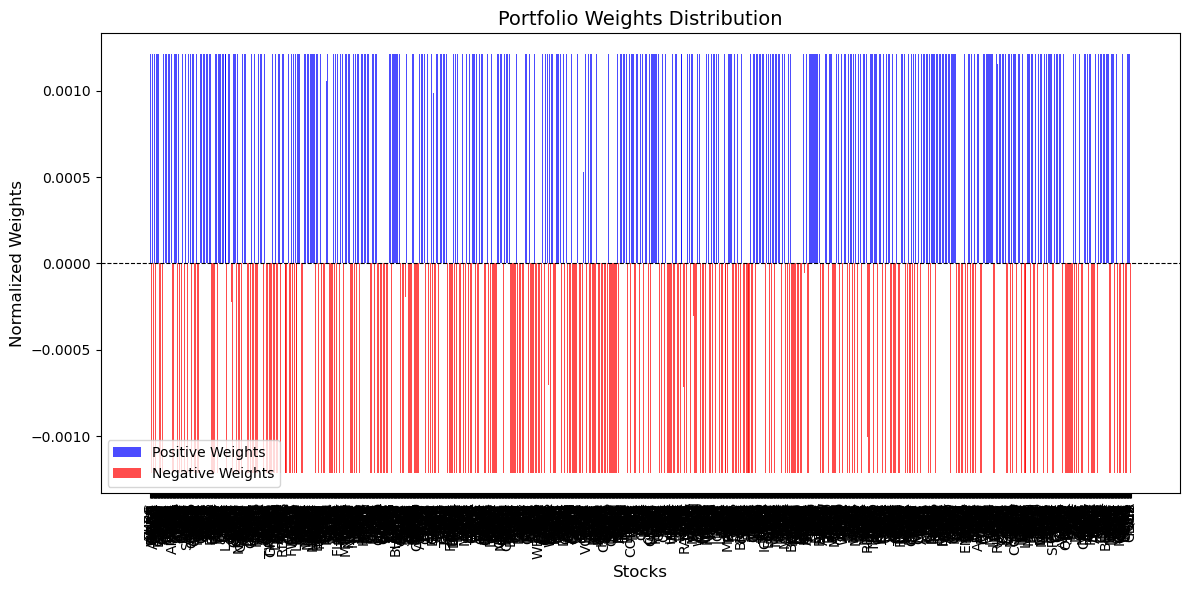

In [70]:
import matplotlib.pyplot as plt
import numpy as np

tickers = df1['tic'].values

plt.figure(figsize=(12, 6))

plt.bar(tickers, positive_weights, label="Positive Weights", color="blue", alpha=0.7)
plt.bar(tickers, negative_weights, label="Negative Weights", color="red", alpha=0.7)

plt.xlabel("Stocks", fontsize=12)
plt.ylabel("Normalized Weights", fontsize=12)
plt.title("Portfolio Weights Distribution", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.axhline(0, color='black', linewidth=0.8, linestyle="--")
plt.legend()
plt.tight_layout()

plt.show()

In [71]:
# Calculate the Sharpe Ratio
# Sharpe Ratio = (Expected Return - Risk-Free Rate) / Portfolio Volatility
risk_free_rate = 0.04

# Calculate the expected return and risk (portfolio volatility)
expected_return = (ret_ @ optimal_weights)/100
portfolio_variance = optimal_weights.T @ cov_ @ optimal_weights
portfolio_volatility = np.sqrt(portfolio_variance)

# Compute Sharpe Ratio
sharpe_ratio = (expected_return - risk_free_rate) / portfolio_volatility

print(f"Sharpe Ratio: {sharpe_ratio[0]:.4f}")  # Sharpe ratio is a single value

Sharpe Ratio: 2.3914


### Modified Training Data (2013-2022)

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

df_z_normalized_capped['date'] = pd.to_datetime(df_z_normalized_capped['date'], errors='coerce')

# Filter the dataset for training (2013-2020)
training_data = df_z_normalized_capped[df_z_normalized_capped['date'].dt.year <= 2022]

# Define features and target variable
features = [
    'ni', 'gross_margin', 'epspx', 'ep_ratio', 'bp_ratio', 
    'ps_ratio', 'ev_to_ebitda', 'current_ratio', 
    'debt_to_equity', 'interest_coverage', 'xint'
]
target = 'ret'

X = training_data[features]
y = training_data[target]

# Fit a linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Extract the weights (coefficients)
feature_weights = pd.DataFrame({
    'Feature': features,
    'Weight': regression_model.coef_
})

feature_weights

,Feature,Weight
0,ni,-0.000656
1,gross_margin,-0.020170
2,epspx,-0.001949
3,ep_ratio,-0.002144
4,bp_ratio,-0.002385
5,ps_ratio,0.000617
6,ev_to_ebitda,-0.000450
7,current_ratio,0.003779
8,debt_to_equity,-0.000245
9,interest_coverage,-0.002476


In [73]:
feature_weights['Normalized Weight'] = feature_weights['Weight'] / feature_weights['Weight'].sum()
feature_weights

,Feature,Weight,Normalized Weight
0,ni,-0.000656,0.020519
1,gross_margin,-0.020170,0.631009
2,epspx,-0.001949,0.060986
3,ep_ratio,-0.002144,0.067086
4,bp_ratio,-0.002385,0.074606
5,ps_ratio,0.000617,-0.019318
6,ev_to_ebitda,-0.000450,0.014073
7,current_ratio,0.003779,-0.118208
8,debt_to_equity,-0.000245,0.007656
9,interest_coverage,-0.002476,0.077447


### Applying on Test Data (2023)

In [74]:
# Create a training dataset (2013-2022)
test_data = df_z_normalized_capped[df_z_normalized_capped['date'].dt.year >= 2023].copy()

# Multiply the normalized weights to their respective features
for feature, weight in zip(feature_weights['Feature'], feature_weights['Normalized Weight']):
    test_data[feature] = test_data[feature] * weight
    
test_data

,permno,date,tic,ni,xint,epspx,ep_ratio,bp_ratio,ps_ratio,ev_to_ebitda,gross_margin,current_ratio,debt_to_equity,interest_coverage,ret
84,11581,2023-08-31,EPAC,-0.003349,-0.066854,-0.000992,-0.010259,0.019952,0.001096,-0.000433,0.011439,-0.025024,-0.000151,-0.000440,0.056252
166,12076,2023-01-31,SIG,-0.000016,-0.067575,0.004131,0.015180,-0.026803,-0.010725,-0.000404,0.010645,0.023964,-0.000138,0.001809,0.174157
421,13379,2023-01-31,SPLK,-0.006625,-0.051833,-0.003125,-0.004993,-0.089815,0.007255,-0.005370,0.013638,0.040563,-0.007350,-0.000968,0.135768
444,13511,2023-07-31,PANW,0.000620,-0.060944,-0.000591,-0.003024,-0.055832,0.010228,0.000536,0.013367,0.069305,-0.000045,-0.000168,0.034380
513,13936,2023-01-31,PVH,-0.001796,-0.030745,0.000692,0.026418,0.019373,0.001616,0.000058,0.012098,0.039476,-0.000152,-0.000406,0.070804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875404,91463,2023-03-31,CVLT,-0.004181,-0.073880,-0.002395,-0.009824,-0.026962,-0.005349,-0.000314,0.013873,0.036580,-0.000284,0.003800,0.125937
875490,91733,2023-04-30,AVAV,-0.005599,-0.069850,-0.007398,-0.006361,0.079027,0.004904,-0.000124,0.011373,-0.114162,-0.000241,-0.000874,0.200157
875598,92493,2023-06-30,LRN,-0.002538,-0.070041,0.000651,-0.004412,0.046975,-0.006560,-0.000381,0.010475,-0.085878,-0.000189,0.000008,0.101855
875613,92597,2023-09-30,HI,0.001933,-0.036504,-0.000527,-0.010407,-0.013154,0.009221,0.000171,0.010211,0.042301,-0.000051,-0.000586,0.018670


In [75]:
financial_metrics = [col for col in test_data.columns if col not in ['permno', 'tic', 'date', 'ret']]
df1 = test_data.groupby(['permno', 'tic'])[financial_metrics].mean().reset_index()

# Create df2: Each date becomes a column with the corresponding return value
df2 = test_data.pivot_table(
    index=['permno', 'tic'],
    columns='date',
    values='ret',
    fill_value=0
).reset_index()

In [76]:
query = """
SELECT permno, date, ret
FROM crsp.msf
WHERE date BETWEEN '2023-01-01' AND '2023-12-31'
AND permno IN ({permnos})
"""
# Format the query to include permnos from df2
permnos = ', '.join(str(p) for p in df2['permno'].unique())
formatted_query = query.format(permnos=permnos)

# Execute the query and fetch data
crsp_data = db.raw_sql(formatted_query)

# Ensure the date column is in datetime format
crsp_data['date'] = pd.to_datetime(crsp_data['date'])

# Calculate the mean return for each permno at the end of each month
crsp_data['month_end'] = crsp_data['date'] + pd.offsets.MonthEnd(0)
mean_returns = crsp_data.groupby(['permno', 'month_end'])['ret'].mean().reset_index()

# Display the resulting dataframe
print(mean_returns)

      permno  month_end       ret
0      10026 2023-01-31 -0.042816
1      10026 2023-02-28 -0.014585
2      10026 2023-03-31  0.054600
3      10026 2023-04-30  0.033599
4      10026 2023-05-31  0.004896
...      ...        ...       ...
3602   93427 2023-08-31  0.300307
3603   93427 2023-09-30  0.036387
3604   93427 2023-10-31 -0.069740
3605   93427 2023-11-30  0.044516
3606   93427 2023-12-31  0.175602

[3607 rows x 3 columns]


In [77]:
df2_transformed = mean_returns.pivot_table(
    index='permno', 
    columns='month_end', 
    values='ret', 
    aggfunc='first', 
    fill_value=0  # Fill missing values with 0
).reset_index()

# Add 'tic' column by mapping from the original df2 (if available)
if 'tic' in df2.columns:
    permno_to_tic = df2.set_index('permno')['tic'].to_dict()
    df2_transformed['tic'] = df2_transformed['permno'].map(permno_to_tic)

# Reorganize columns to match the desired format
columns_order = ['permno', 'tic'] + [col for col in df2_transformed.columns if col not in ['permno', 'tic']]
df2_transformed = df2_transformed[columns_order]
df2_transformed

month_end,permno,tic,2023-01-31 00:00:00,2023-02-28 00:00:00,2023-03-31 00:00:00,2023-04-30 00:00:00,2023-05-31 00:00:00,2023-06-30 00:00:00,2023-07-31 00:00:00,2023-08-31 00:00:00,2023-09-30 00:00:00,2023-10-31 00:00:00,2023-11-30 00:00:00,2023-12-31 00:00:00
0,10026,JJSF,-0.042816,-0.014585,0.054600,0.033599,0.004896,0.033193,0.012377,0.011290,0.013909,-0.043019,0.050699,0.020207
1,10032,PLXS,-0.067425,-0.001042,0.017520,-0.103515,0.036698,0.083370,0.002545,0.031069,-0.084392,0.057432,0.036310,0.061243
2,10501,AMWD,0.172534,-0.110141,0.021381,-0.029768,0.177751,0.283529,0.003535,0.013439,-0.026522,-0.110832,0.076900,0.282459
3,11533,FICO,0.112550,0.017179,0.037349,0.035948,0.082039,0.027347,0.035541,0.079502,-0.039863,-0.026090,0.285777,0.070256
4,11581,EPAC,0.042829,0.014695,-0.053101,-0.068235,0.069865,0.062156,0.017778,-0.046579,0.008779,0.072266,-0.035336,0.138828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,92493,LRN,0.372442,-0.010715,-0.075818,0.094522,-0.059358,-0.078693,0.026323,0.112013,0.059779,0.220964,0.101855,-0.019974
299,92597,HI,0.098196,0.005975,0.012940,-0.040185,0.051513,0.073588,0.012871,-0.067386,-0.122007,-0.101158,0.018670,0.240901
300,93002,AVGO,0.046286,0.015863,0.087247,-0.023444,0.289641,0.079298,0.035991,0.026974,-0.095038,0.012991,0.100265,0.211476
301,93373,EXPRQ,0.137255,-0.120690,-0.227157,0.024356,-0.293622,0.040323,0.302663,-0.347348,-0.108028,-0.011111,-0.034831,-0.025611


In [78]:
# Identify 'tic' and 'permno' pairs in df1 but not in df2_transformed
df1_tic_permno = set(zip(df1['tic'], df1['permno']))
df2_tic_permno = set(zip(df2_transformed['tic'], df2_transformed['permno']))

# Find the difference
missing_tic_permno = df1_tic_permno - df2_tic_permno

# Convert the result to a dataframe for better readability
missing_tic_permno_df = pd.DataFrame(list(missing_tic_permno), columns=['tic', 'permno'])

# Display the missing pairs
#import ace_tools as tools; tools.display_dataframe_to_user(name="TIC and PERMNO Missing in df2_transformed", dataframe=missing_tic_permno_df)
missing_tic_permno_df

,tic,permno
0,TLRY,18221
1,NTTYY,80863
2,STZ,64899
3,WRK,80361


In [79]:
# Filter df1 to keep only tic and permno pairs present in df2_transformed
valid_tic_permno = df2_tic_permno
df1_filtered = df1[df1.apply(lambda row: (row['tic'], row['permno']) in valid_tic_permno, axis=1)]

df1_filtered

,permno,tic,ni,xint,epspx,ep_ratio,bp_ratio,ps_ratio,ev_to_ebitda,gross_margin,current_ratio,debt_to_equity,interest_coverage
0,10026,JJSF,-0.003023,-0.071811,0.001533,0.001135,0.090228,-0.011786,-0.000332,0.010103,-0.028409,-0.000272,0.000180
1,10032,PLXS,-0.002415,-0.058843,0.002287,0.013239,0.004523,-0.013182,-0.000034,0.008307,0.028964,-0.000223,-0.000491
2,10501,AMWD,-0.002873,-0.066368,0.002768,0.006748,0.056157,-0.015921,-0.000282,0.009108,-0.005590,-0.000194,-0.000422
3,11533,FICO,0.000516,-0.027867,0.012020,0.000386,-0.193080,-0.004115,-0.000503,0.013660,0.026682,-0.000822,-0.000500
4,11581,EPAC,-0.003349,-0.066854,-0.000992,-0.010259,0.019952,0.001096,-0.000433,0.011439,-0.025024,-0.000151,-0.000440
...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,92493,LRN,-0.002538,-0.070041,0.000651,-0.004412,0.046975,-0.006560,-0.000381,0.010475,-0.085878,-0.000189,0.000008
303,92597,HI,0.001933,-0.036504,-0.000527,-0.010407,-0.013154,0.009221,0.000171,0.010211,0.042301,-0.000051,-0.000586
304,93002,AVGO,0.061557,0.552430,0.025448,0.025621,-0.004446,0.009747,-0.000523,0.013304,-0.049153,0.000016,-0.000354
305,93373,EXPRQ,-0.000853,-0.065560,0.001710,-0.009138,-0.031357,-0.015115,-0.021141,0.009907,0.057359,0.000145,-0.000930


In [80]:
df1 = df1_filtered
df2 = df2_transformed

In [81]:
# Rename columns in df2 after 'tic' and 'permno' to sequential integers starting from 1
new_column_names = ['permno', 'tic'] + list(range(1, len(df2.columns) - 1))
df2.columns = new_column_names

In [82]:
# Drop the 'permno' column from df1 and df2
df1 = df1.drop(columns=['permno'], errors='ignore')
df2 = df2.drop(columns=['permno'], errors='ignore')

In [83]:
df2.to_csv('df2-2.csv', index=False)

In [84]:
df2 = pd.read_csv('df2-2.csv')

ret = df2[[str(i) for i in range(1,13)]].mean(axis=1)*12 #mean vector (annualized)
df1['ret'] = ret

In [85]:
ret

0      0.134350
1      0.069813
2      0.754265
3      0.717535
4      0.223945
         ...   
298    0.743340
299    0.183918
300    0.787550
301   -0.663801
302    0.505056
Length: 303, dtype: float64

In [86]:
cov = df2[[str(i) for i in range(1,13)]].T.cov()*12 #variance-covariance matrix (annualized)
ret.shape, cov.shape

((303,), (303, 303))

In [87]:
ret_ = ret.to_numpy().reshape(1,-1)
cov_ = cov.to_numpy()

N = 303
A = 2 # risk aversion parameter A

In [88]:
import numpy as np
import cvxpy as cp

# Ensure the covariance matrix is positive semidefinite
epsilon = 1e-6
cov_ = cov_.copy() + epsilon * np.eye(cov_.shape[0])

# Variables
w = cp.Variable(N)

# Define the objective
mu = ret_ @ w  # Expected return
risk = cp.quad_form(w, cov_)  # Risk (variance)

objective = cp.Maximize(mu - A * risk)

# Define the constraints
constraints = [cp.sum(w) == 0,  # Market neutrality
               w >= -1,         # Short constraints
               w <= 1]          # Long constraints

# Solve the problem
prob = cp.Problem(objective, constraints)
prob.solve()

# Extract optimal weights
optimal_weights = w.value

# Normalize weights for positive and negative positions
positive_weights = np.maximum(optimal_weights, 0)
negative_weights = np.minimum(optimal_weights, 0)

positive_weights /= positive_weights.sum()
negative_weights /= -negative_weights.sum()

print(f"Positive Weights Sum to: {positive_weights.sum():.4f}")
print(f"Negative Weights Sum to: {negative_weights.sum():.4f}")

Positive Weights Sum to: 1.0000
Negative Weights Sum to: -1.0000


In [89]:
print(mu.value, cp.sqrt(risk).value)

[81.64251566] 0.3641582604819458


In [90]:
print("Optimal Weights (Normalized):")
print("\nPositive weights:", positive_weights)
print("\nNegative weights:", negative_weights)

Optimal Weights (Normalized):

Positive weights: [0.         0.         0.00672532 0.00672532 0.00672532 0.
 0.         0.00672532 0.00672532 0.00672532 0.         0.
 0.00672532 0.         0.         0.00672532 0.00672532 0.
 0.00428102 0.         0.         0.00672532 0.00672532 0.00672532
 0.00672532 0.         0.         0.         0.         0.
 0.00672532 0.00672532 0.         0.         0.         0.00672532
 0.00672532 0.00672532 0.         0.         0.         0.00672532
 0.         0.00672532 0.00672532 0.         0.         0.00672532
 0.00672532 0.00672532 0.         0.00672532 0.00672532 0.
 0.         0.         0.00672532 0.         0.00672532 0.
 0.00672532 0.00672532 0.         0.         0.         0.
 0.00672532 0.         0.         0.         0.         0.00672532
 0.00334482 0.00209926 0.00672532 0.00672532 0.00672532 0.
 0.         0.         0.00672532 0.         0.         0.
 0.         0.         0.00672532 0.         0.00672532 0.00672532
 0.00672532 0.0067

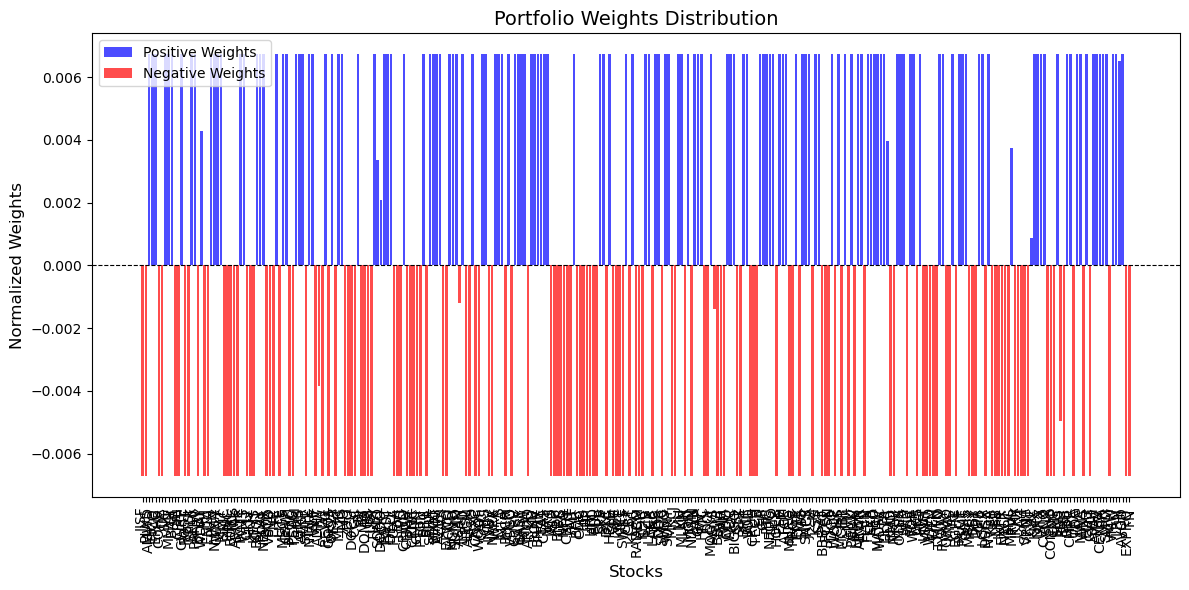

In [91]:
import matplotlib.pyplot as plt
import numpy as np

tickers = df1['tic'].values

plt.figure(figsize=(12, 6))

plt.bar(tickers, positive_weights, label="Positive Weights", color="blue", alpha=0.7)
plt.bar(tickers, negative_weights, label="Negative Weights", color="red", alpha=0.7)

plt.xlabel("Stocks", fontsize=12)
plt.ylabel("Normalized Weights", fontsize=12)
plt.title("Portfolio Weights Distribution", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.axhline(0, color='black', linewidth=0.8, linestyle="--")
plt.legend()
plt.tight_layout()

plt.show()

In [92]:
# Calculate the Sharpe Ratio
# Sharpe Ratio = (Expected Return - Risk-Free Rate) / Portfolio Volatility
risk_free_rate = 0.04

# Calculate the expected return and risk (portfolio volatility)
expected_return = (ret_ @ optimal_weights)/100
portfolio_variance = optimal_weights.T @ cov_ @ optimal_weights
portfolio_volatility = np.sqrt(portfolio_variance)

# Compute Sharpe Ratio
sharpe_ratio = (expected_return - risk_free_rate) / portfolio_volatility

print(f"Sharpe Ratio: {sharpe_ratio[0]:.4f}")

Sharpe Ratio: 2.1321


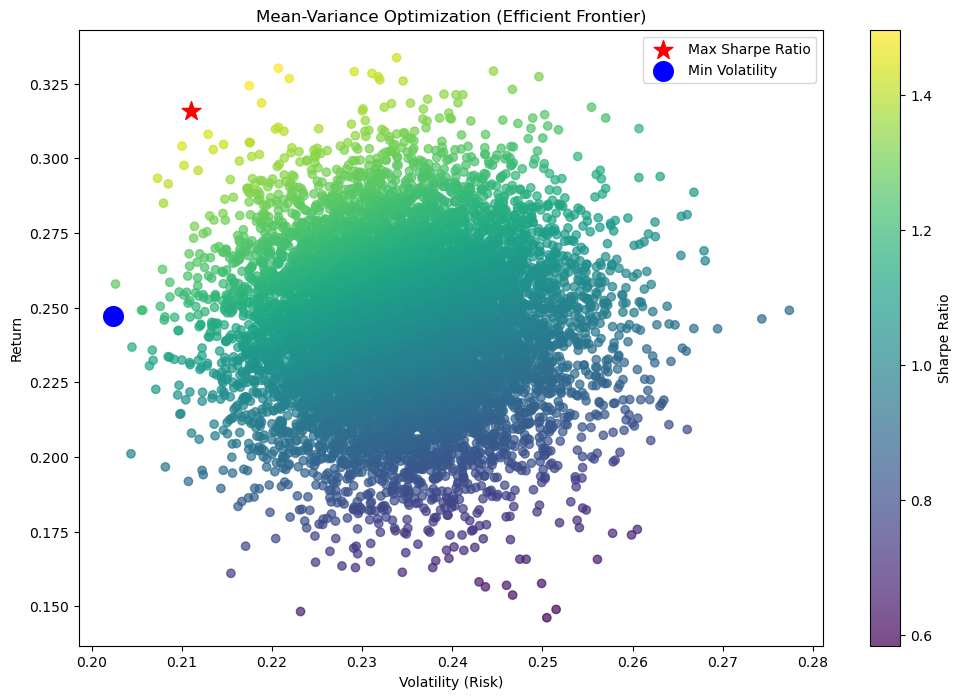

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Number of portfolios to simulate
num_portfolios = 10000

# Randomly generate portfolio weights
weights = np.random.dirichlet(np.ones(ret.shape[0]), num_portfolios)

# Reshape ret_ to match the dimensionality
ret_flat = ret_.flatten()  # Convert ret_ to a 1D array

# Calculate portfolio returns and volatility
portfolio_returns = np.dot(weights, ret_flat)
portfolio_volatility = np.sqrt(np.diag(weights @ cov_ @ weights.T))

# Calculate Sharpe Ratios (assuming risk-free rate = 0)
sharpe_ratios = portfolio_returns / portfolio_volatility

# Find the optimal portfolios
max_sharpe_idx = np.argmax(sharpe_ratios)  # Portfolio with maximum Sharpe ratio
min_volatility_idx = np.argmin(portfolio_volatility)  # Portfolio with minimum volatility

# Plot the efficient frontier
plt.figure(figsize=(12, 8))
plt.scatter(portfolio_volatility, portfolio_returns, c=sharpe_ratios, cmap='viridis', alpha=0.7)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(portfolio_volatility[max_sharpe_idx], portfolio_returns[max_sharpe_idx], color='r', label='Max Sharpe Ratio', marker='*', s=200)
plt.scatter(portfolio_volatility[min_volatility_idx], portfolio_returns[min_volatility_idx], color='b', label='Min Volatility', marker='o', s=200)

# Labels and legend
plt.title('Mean-Variance Optimization (Efficient Frontier)')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Return')
plt.legend()
plt.show()